# Análisis de consumo de Netflix con Python

## 1. Dependencias y carga de datos

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

La data se consigue desde la misma cuenta de Netflix
- https://help.netflix.com/es/node/101917

In [25]:
data = pd.read_csv('NetflixViewingHistory.csv')

## 2. EDA(Análisis Exploratorio de Datos)

In [26]:
data.shape

(4779, 2)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4779 entries, 0 to 4778
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   4779 non-null   object
 1   Date    4779 non-null   object
dtypes: object(2)
memory usage: 74.8+ KB


In [28]:
data.head()

,Title,Date
0,Squid Game: Season 1: The Man with the Umbrella,10/4/21
1,Squid Game: Season 1: Hell,10/4/21
2,"Squid Game: Season 1: Red Light, Green Light",10/4/21
3,Squid Game: Season 1: Gganbu,10/4/21
4,Squid Game: Season 1: A Fair World,10/4/21


Vemos que parece que existe un patrón en el que diferentes partes se se separan mediante dos puntos. Vamos a contar en cuantas partes distintas se seperan nuestros contenidos

In [29]:
separacion_lista = data['Title'].str.split(pat = ':', expand=False).to_frame()
separacion_lista

,Title
0,"[Squid Game, Season 1, The Man with the Umbr..."
1,"[Squid Game, Season 1, Hell]"
2,"[Squid Game, Season 1, Red Light, Green Light]"
3,"[Squid Game, Season 1, Gganbu]"
4,"[Squid Game, Season 1, A Fair World]"
...,...
4774,[The Do-Over]
4775,[Cars]
4776,[Lusers]
4777,[A Monster Calls]


In [30]:
separacion_lista['num_partes'] = separacion_lista['Title'].apply(len)
separacion_lista

,Title,num_partes
0,"[Squid Game, Season 1, The Man with the Umbr...",3
1,"[Squid Game, Season 1, Hell]",3
2,"[Squid Game, Season 1, Red Light, Green Light]",3
3,"[Squid Game, Season 1, Gganbu]",3
4,"[Squid Game, Season 1, A Fair World]",3
...,...,...
4774,[The Do-Over],1
4775,[Cars],1
4776,[Lusers],1
4777,[A Monster Calls],1


In [31]:
#separacion_lista.num_partes.value_counts()
separacion_lista.groupby('num_partes').size().sort_values(ascending=False)

num_partes
3    3353
4     635
1     542
2     191
5      52
6       6
dtype: int64

### 2.1. Vamos a analizar los títulos por número de partes a ver si hay algún patrón.

In [32]:
separacion_lista[separacion_lista.num_partes == 1].head(10)

,Title,num_partes
8,[The Influence],1
9,[Cuidado con lo que deseas],1
15,[Mark of the Devil],1
16,[Leprechaun Returns],1
20,[Main Hoon Na],1
21,[Asoka],1
32,[The Dark Knight],1
61,[Spider-Man 2],1
72,[Spider-Man],1
82,[The Change-Up],1


In [33]:
separacion_lista[separacion_lista.num_partes == 2].head(10) 

,Title,num_partes
17,"[Rurouni Kenshin, The Final]",2
19,"[Rurouni Kenshin, The Beginning]",2
30,"[The Seven Deadly Sins, Cursed by Light]",2
77,"[The Spectacular Spider-Man, Reinforcement]",2
78,"[The Spectacular Spider-Man, Destructive Test...",2
79,"[The Spectacular Spider-Man, Blueprints]",2
97,"[Alvin and the Chipmunks, Chipwrecked]",2
161,"[SAS, Rise of the Black Swan]",2
212,"[Sicario, Day of the Soldado]",2
213,"[The Witcher, Nightmare of the Wolf]",2


In [34]:
separacion_lista[separacion_lista.num_partes == 3].head(10)

,Title,num_partes
0,"[Squid Game, Season 1, The Man with the Umbr...",3
1,"[Squid Game, Season 1, Hell]",3
2,"[Squid Game, Season 1, Red Light, Green Light]",3
3,"[Squid Game, Season 1, Gganbu]",3
4,"[Squid Game, Season 1, A Fair World]",3
5,"[Squid Game, Season 1, One Lucky Day]",3
6,"[Squid Game, Season 1, Front Man]",3
7,"[Squid Game, Season 1, VIPS]",3
10,"[Squid Game, Season 1, Stick to the Team]",3
11,"[Baki Hanma, Season 1, The Prison Guard talk...",3


In [35]:
separacion_lista[separacion_lista.num_partes == 4].head(10)

,Title,num_partes
35,"[Demon Slayer, Kimetsu no Yaiba, Tanjiro Kam...",4
36,"[Demon Slayer, Kimetsu no Yaiba, Tanjiro Kam...",4
37,"[Demon Slayer, Kimetsu no Yaiba, Tanjiro Kam...",4
38,"[Demon Slayer, Kimetsu no Yaiba, Tanjiro Kam...",4
39,"[Demon Slayer, Kimetsu no Yaiba, Tanjiro Kam...",4
40,"[Demon Slayer, Kimetsu no Yaiba, Tanjiro Kam...",4
41,"[Demon Slayer, Kimetsu no Yaiba, Tanjiro Kam...",4
42,"[Demon Slayer, Kimetsu no Yaiba, Tanjiro Kam...",4
43,"[Demon Slayer, Kimetsu no Yaiba, Tanjiro Kam...",4
44,"[Demon Slayer, Kimetsu no Yaiba, Tanjiro Kam...",4


In [36]:
separacion_lista[separacion_lista.num_partes == 5].head(10)

,Title,num_partes
595,"[The Legend of Korra, Book Four, Balance, O...",5
624,"[The Legend of Korra, Book Two, Spirits, Be...",5
625,"[The Legend of Korra, Book Two, Spirits, Be...",5
628,"[The Legend of Korra, Book Two, Spirits, Ci...",5
629,"[The Legend of Korra, Book Two, Spirits, Ci...",5
1254,"[Black Lightning, Season 2, The Book of Apoc...",5
1255,"[Black Lightning, Season 2, The Book of Apoc...",5
1256,"[Black Lightning, Season 3, The Book of War,...",5
1257,"[Black Lightning, Season 3, The Book of War,...",5
1258,"[Black Lightning, Season 3, The Book of War,...",5


In [37]:
separacion_lista[separacion_lista.num_partes == 6].head(10) 

,Title,num_partes
2135,"[Avatar, The Last Airbender, Book 3, Sozin'...",6
2136,"[Avatar, The Last Airbender, Book 3, Sozin'...",6
2137,"[Avatar, The Last Airbender, Book 3, Sozin'...",6
2138,"[Avatar, The Last Airbender, Book 3, Sozin'...",6
2163,"[Avatar, The Last Airbender, Book 2, Journe...",6
2164,"[Avatar, The Last Airbender, Book 2, Journe...",6


## 3. Creando variables

Nuestro dataset original tiene muy pocas variables, pero con un poco de trabajo podemos generar nuevas variables. Este proceso se llama "feature extraction".

### 3.1 Variables según el título: Película o Serie

Teniendo en cuenta el análisis anterior clasificamos en base a las separaciones, si tiene menos de 3 se considera película, caso contrario lo consideramos como una serie.

In [38]:
separacion_lista['tipo'] = np.where(separacion_lista.num_partes <3, 'pelicula', 'serie')
separacion_lista

,Title,num_partes,tipo
0,"[Squid Game, Season 1, The Man with the Umbr...",3,serie
1,"[Squid Game, Season 1, Hell]",3,serie
2,"[Squid Game, Season 1, Red Light, Green Light]",3,serie
3,"[Squid Game, Season 1, Gganbu]",3,serie
4,"[Squid Game, Season 1, A Fair World]",3,serie
...,...,...,...
4774,[The Do-Over],1,pelicula
4775,[Cars],1,pelicula
4776,[Lusers],1,pelicula
4777,[A Monster Calls],1,pelicula


In [39]:
data = pd.concat([data,separacion_lista['tipo']], axis = 1)
data 

,Title,Date,tipo
0,Squid Game: Season 1: The Man with the Umbrella,10/4/21,serie
1,Squid Game: Season 1: Hell,10/4/21,serie
2,"Squid Game: Season 1: Red Light, Green Light",10/4/21,serie
3,Squid Game: Season 1: Gganbu,10/4/21,serie
4,Squid Game: Season 1: A Fair World,10/4/21,serie
...,...,...,...
4774,The Do-Over,3/13/18,pelicula
4775,Cars,3/12/18,pelicula
4776,Lusers,2/17/18,pelicula
4777,A Monster Calls,2/14/18,pelicula


Vamos a dividir los títulos en sus diferentes niveles y generar así nuevas variables

In [42]:
separacion_cols = data.Title.str.split(pat = ':', expand=True)
separacion_cols

,0,1,2,3,4,5
0,Squid Game,Season 1,The Man with the Umbrella,None,None,None
1,Squid Game,Season 1,Hell,None,None,None
2,Squid Game,Season 1,"Red Light, Green Light",None,None,None
3,Squid Game,Season 1,Gganbu,None,None,None
4,Squid Game,Season 1,A Fair World,None,None,None
...,...,...,...,...,...,...
4774,The Do-Over,None,None,None,None,None
4775,Cars,None,None,None,None,None
4776,Lusers,None,None,None,None,None
4777,A Monster Calls,None,None,None,None,None


In [43]:
separacion_cols.columns = ['nivel1','nivel2','nivel3','nivel4','nivel5', 'nivel6']
separacion_cols

,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6
0,Squid Game,Season 1,The Man with the Umbrella,None,None,None
1,Squid Game,Season 1,Hell,None,None,None
2,Squid Game,Season 1,"Red Light, Green Light",None,None,None
3,Squid Game,Season 1,Gganbu,None,None,None
4,Squid Game,Season 1,A Fair World,None,None,None
...,...,...,...,...,...,...
4774,The Do-Over,None,None,None,None,None
4775,Cars,None,None,None,None,None
4776,Lusers,None,None,None,None,None
4777,A Monster Calls,None,None,None,None,None


In [44]:
#juntamos a la data actual
data = pd.concat([data,separacion_cols], axis = 1)
data 

,Title,Date,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6
0,Squid Game: Season 1: The Man with the Umbrella,10/4/21,serie,Squid Game,Season 1,The Man with the Umbrella,None,None,None
1,Squid Game: Season 1: Hell,10/4/21,serie,Squid Game,Season 1,Hell,None,None,None
2,"Squid Game: Season 1: Red Light, Green Light",10/4/21,serie,Squid Game,Season 1,"Red Light, Green Light",None,None,None
3,Squid Game: Season 1: Gganbu,10/4/21,serie,Squid Game,Season 1,Gganbu,None,None,None
4,Squid Game: Season 1: A Fair World,10/4/21,serie,Squid Game,Season 1,A Fair World,None,None,None
...,...,...,...,...,...,...,...,...,...
4774,The Do-Over,3/13/18,pelicula,The Do-Over,None,None,None,None,None
4775,Cars,3/12/18,pelicula,Cars,None,None,None,None,None
4776,Lusers,2/17/18,pelicula,Lusers,None,None,None,None,None
4777,A Monster Calls,2/14/18,pelicula,A Monster Calls,None,None,None,None,None


### 3.2 Variables derivadas de la fecha

Podemos extraer los diferentes compontentes de una fecha para generar nuevas variables.

In [45]:
data['fecha'] = pd.to_datetime(data['Date'])
data.drop(columns = 'Date',inplace = True)
data 

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6,fecha
0,Squid Game: Season 1: The Man with the Umbrella,serie,Squid Game,Season 1,The Man with the Umbrella,None,None,None,2021-10-04
1,Squid Game: Season 1: Hell,serie,Squid Game,Season 1,Hell,None,None,None,2021-10-04
2,"Squid Game: Season 1: Red Light, Green Light",serie,Squid Game,Season 1,"Red Light, Green Light",None,None,None,2021-10-04
3,Squid Game: Season 1: Gganbu,serie,Squid Game,Season 1,Gganbu,None,None,None,2021-10-04
4,Squid Game: Season 1: A Fair World,serie,Squid Game,Season 1,A Fair World,None,None,None,2021-10-04
...,...,...,...,...,...,...,...,...,...
4774,The Do-Over,pelicula,The Do-Over,None,None,None,None,None,2018-03-13
4775,Cars,pelicula,Cars,None,None,None,None,None,2018-03-12
4776,Lusers,pelicula,Lusers,None,None,None,None,None,2018-02-17
4777,A Monster Calls,pelicula,A Monster Calls,None,None,None,None,None,2018-02-14


In [46]:
data.set_index('fecha', inplace = True)
data

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6
fecha,,,,,,,,
2021-10-04,Squid Game: Season 1: The Man with the Umbrella,serie,Squid Game,Season 1,The Man with the Umbrella,None,None,None
2021-10-04,Squid Game: Season 1: Hell,serie,Squid Game,Season 1,Hell,None,None,None
2021-10-04,"Squid Game: Season 1: Red Light, Green Light",serie,Squid Game,Season 1,"Red Light, Green Light",None,None,None
2021-10-04,Squid Game: Season 1: Gganbu,serie,Squid Game,Season 1,Gganbu,None,None,None
2021-10-04,Squid Game: Season 1: A Fair World,serie,Squid Game,Season 1,A Fair World,None,None,None
...,...,...,...,...,...,...,...,...
2018-03-13,The Do-Over,pelicula,The Do-Over,None,None,None,None,None
2018-03-12,Cars,pelicula,Cars,None,None,None,None,None
2018-02-17,Lusers,pelicula,Lusers,None,None,None,None,None


Creamos una función para extraer los componentes.

In [47]:
def atributos_fechas(df):
  df['año'] = data.index.year
  df['mes'] = data.index.month_name()
  df['dia_mes'] = data.index.day
  df['dia_semana'] = data.index.day_name()
  return(df)

In [48]:
atributos_fechas(data)

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,,
2021-10-04,Squid Game: Season 1: The Man with the Umbrella,serie,Squid Game,Season 1,The Man with the Umbrella,None,None,None,2021,October,4,Monday
2021-10-04,Squid Game: Season 1: Hell,serie,Squid Game,Season 1,Hell,None,None,None,2021,October,4,Monday
2021-10-04,"Squid Game: Season 1: Red Light, Green Light",serie,Squid Game,Season 1,"Red Light, Green Light",None,None,None,2021,October,4,Monday
2021-10-04,Squid Game: Season 1: Gganbu,serie,Squid Game,Season 1,Gganbu,None,None,None,2021,October,4,Monday
2021-10-04,Squid Game: Season 1: A Fair World,serie,Squid Game,Season 1,A Fair World,None,None,None,2021,October,4,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-13,The Do-Over,pelicula,The Do-Over,None,None,None,None,None,2018,March,13,Tuesday
2018-03-12,Cars,pelicula,Cars,None,None,None,None,None,2018,March,12,Monday
2018-02-17,Lusers,pelicula,Lusers,None,None,None,None,None,2018,February,17,Saturday


## 4. Análisis de consumo en base al nuevo dataset

<b>¿Cuánto tiempo llevo consumiendo Netflix?</b>

In [50]:
from datetime import date

hoy = pd.Timestamp(date.today())

primer_dia = data.index.min()

tiempo = hoy - primer_dia

print(f'Alonso, llevas usando Netflix {tiempo.days} dias')

Alonso, llevas usando Netflix 1329 dias


<b>¿Cuánto me he gastado en Netflix hasta ahora?</b>

In [54]:
#Coste compartido de 11.50 por persona, en total el pago mensual es de 44.50
coste_mensual = 11.50

gasto = tiempo.days / 30 * coste_mensual

print(f'Alonso, hasta ahora te has gastado S/. {gasto} soles en Netflix')

Alonso, hasta ahora te has gastado S/. 509.45 soles en Netflix


<b>¿Cuánto tiempo de mi vida le dedico cada año a Netflix?</b>

In [65]:
media_min_serie = 40
media_min_peli = 100

consumo = data[data.año < 2021].groupby('tipo').Title.count()

minutos_pelis_año = consumo['pelicula'] * media_min_peli / 3

minutos_series_año = consumo['serie'] * media_min_serie / 3

dias_pelis_año = minutos_pelis_año / 60 / 24

dias_series_año = minutos_series_año / 60 / 24

print(f'Alonso, al año dedicas {round(dias_series_año)} días de tu vida a ver series y {round(dias_pelis_año)} días de tu vida a ver películas')

Alonso, al año dedicas 24 días de tu vida a ver series y 12 días de tu vida a ver películas


<b>¿Cuáles son las 10 series de las que he visto más capítulos?</b>

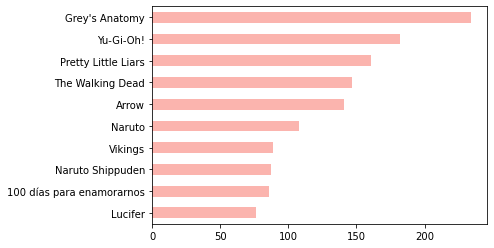

In [66]:
data[data.tipo == 'serie']['nivel1'].value_counts(ascending = True).tail(10).plot.barh(cmap = 'Pastel1');

<b>¿Qué día de la semana suelo ver más series?</b>

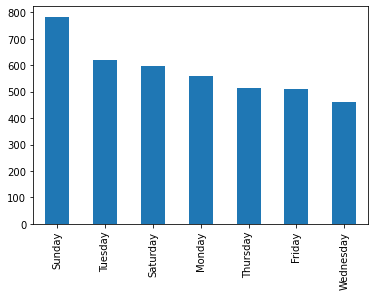

In [72]:
data.loc[data.tipo == 'serie', 'dia_semana'].value_counts().plot(kind = 'bar');

domingo y martes como los días más ideales para ver series

# 
<b>¿Qué día de la semana suelo ver más películas?</b>

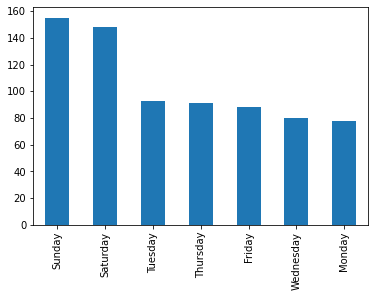

In [73]:
data.loc[data.tipo == 'pelicula', 'dia_semana'].value_counts().plot(kind = 'bar');

domingo y sábado como los días más ideales para ver series

# 
<b>¿Existen diferencias en cuando veo Netflix entre series y películas?</b>

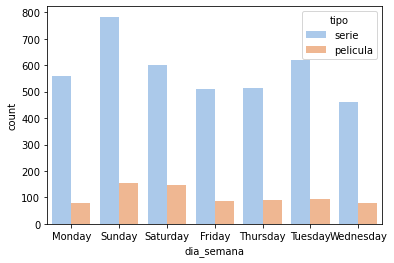

In [76]:
import seaborn as sns

sns.countplot(data = data, x = 'dia_semana', hue = 'tipo', palette= 'pastel');

# 
<b>¿En qué mes se consume más Netflix? (Tener en cuenta que es el total desde que se inició hasta el momento)</b>

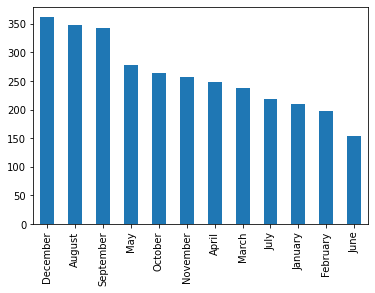

In [78]:
data.loc[data.año < 2021].mes.value_counts().plot.bar();

# 
<b>¿Afectó la cuarentena la cantidad de uso que hice de Netflix?</b>

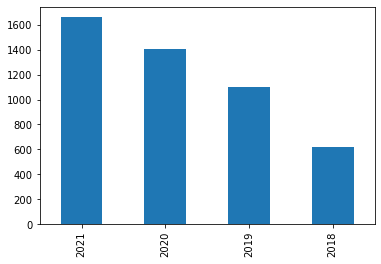

In [85]:
data['año'].value_counts().plot.bar();